In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('Customer-Churn-Records.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [6]:
data.select_dtypes('number')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [7]:
data_cat=data.select_dtypes('object')
data_cat

,Surname,Geography,Gender,Card Type
0,Hargrave,France,Female,DIAMOND
1,Hill,Spain,Female,DIAMOND
2,Onio,France,Female,DIAMOND
3,Boni,France,Female,GOLD
4,Mitchell,Spain,Female,GOLD
...,...,...,...,...
9995,Obijiaku,France,Male,DIAMOND
9996,Johnstone,France,Male,PLATINUM
9997,Liu,France,Female,SILVER
9998,Sabbatini,Germany,Male,GOLD


In [8]:
for i in data_cat.columns.to_list():
    print(i," : ")
    print(data[i].value_counts())
    print("----------------")
    print('\n')

Surname  : 
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
----------------


Geography  : 
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------


Gender  : 
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------


Card Type  : 
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64
----------------




In [9]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# Removing RowNumber,CustomerID as they do not contain useful information for modeling or analysis.
# Surname is also an unwanted column hence dropping it.

In [11]:
data.drop(['RowNumber','CustomerId','Surname'],inplace=True, axis=1)

In [12]:
data.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [13]:
data.skew()

CreditScore          -0.071607
Age                   1.011320
Tenure                0.010991
Balance              -0.141109
NumOfProducts         0.745568
HasCrCard            -0.901812
IsActiveMember       -0.060437
EstimatedSalary       0.002085
Exited                1.470845
Complain              1.466263
Satisfaction Score   -0.008936
Point Earned          0.008344
dtype: float64

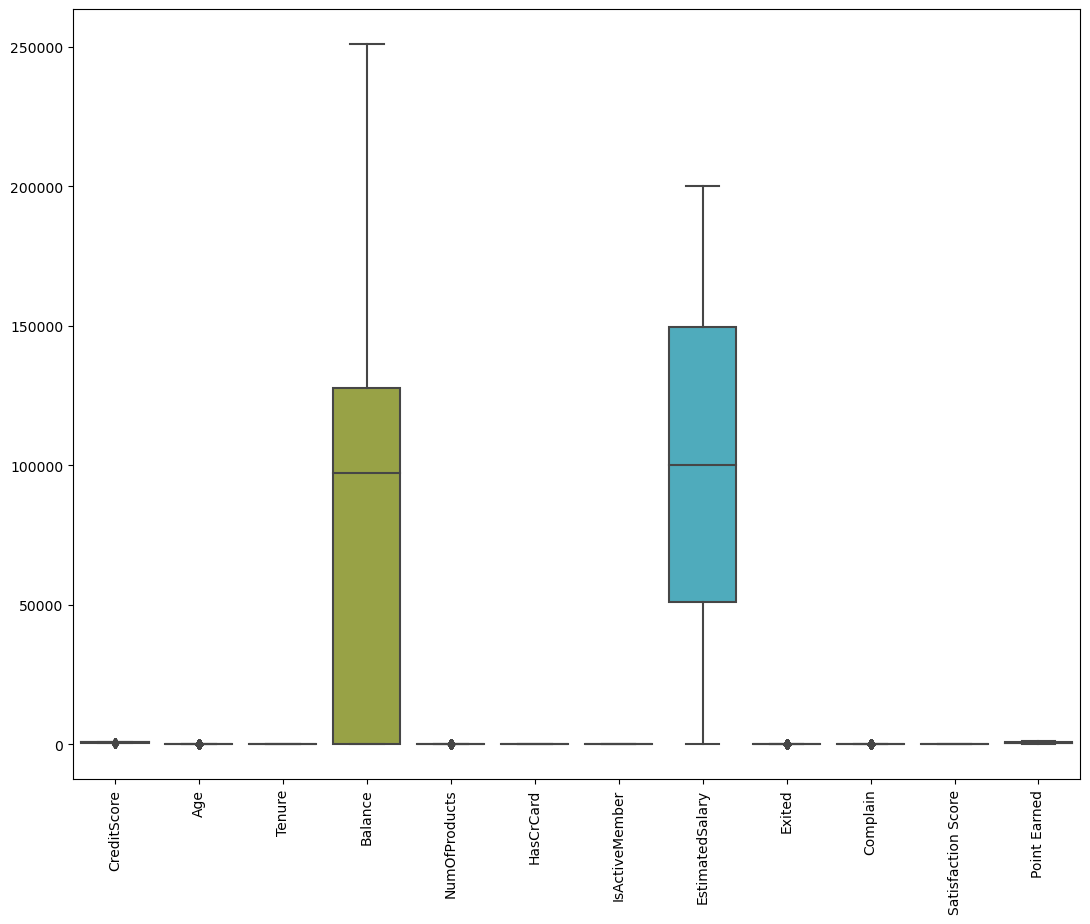

In [14]:
plt.figure(figsize=(13,10))
sns.boxplot(data)
plt.xticks(rotation = 90)
plt.show()

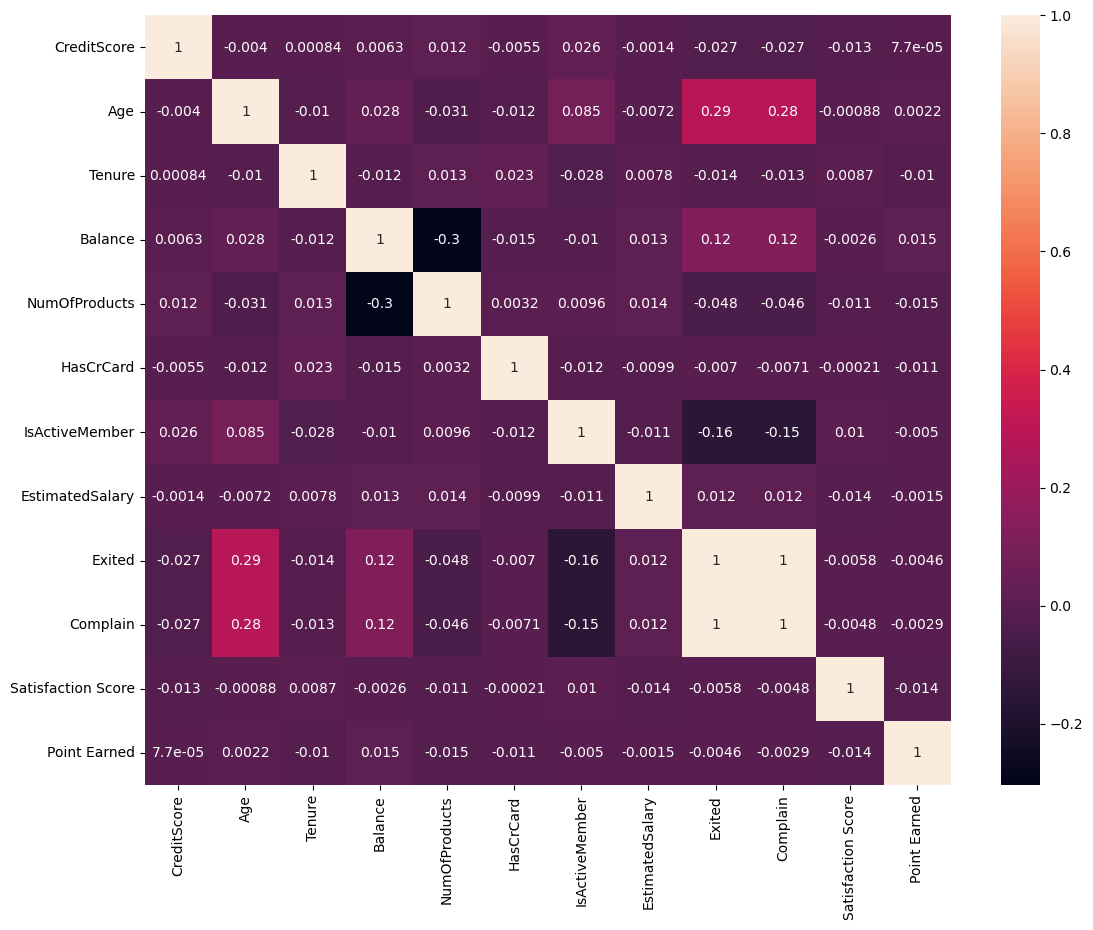

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [16]:
data_num = data.select_dtypes('number')
data_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [17]:
data_num_cont_cols = [i for i in data_num.columns.to_list() if data_num[i].nunique()>25]

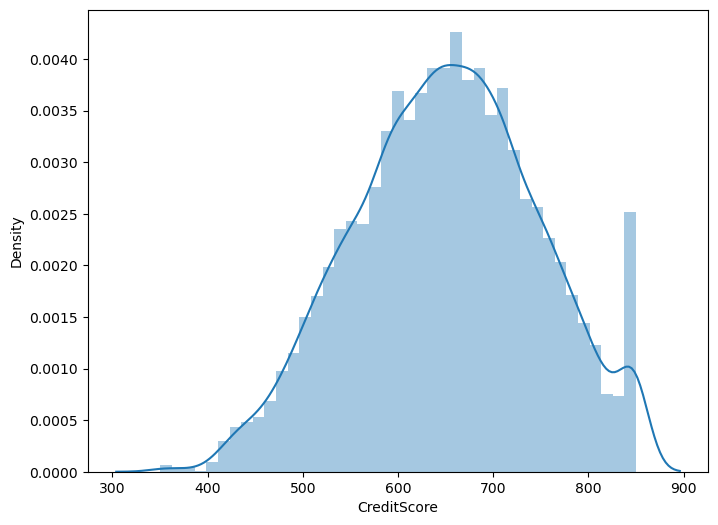

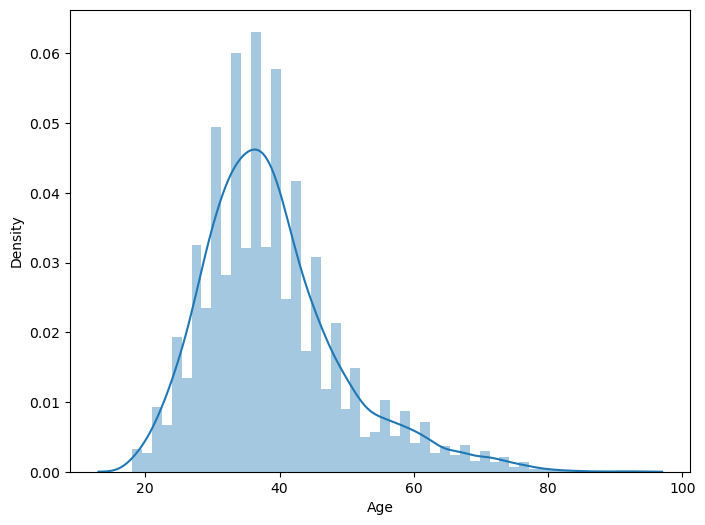

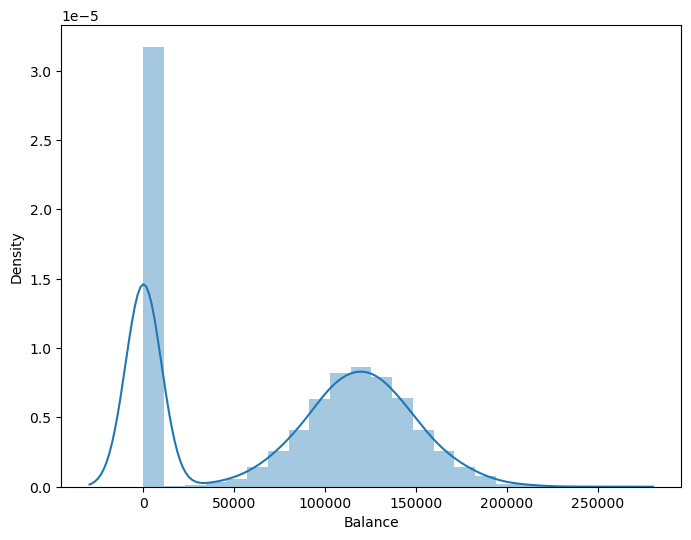

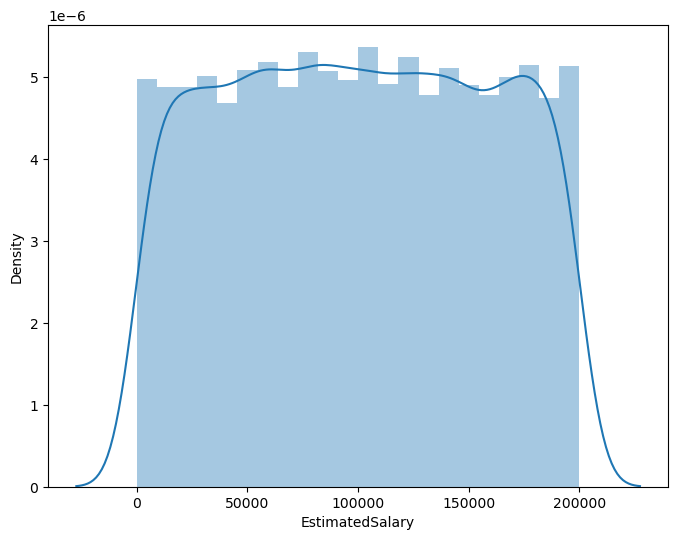

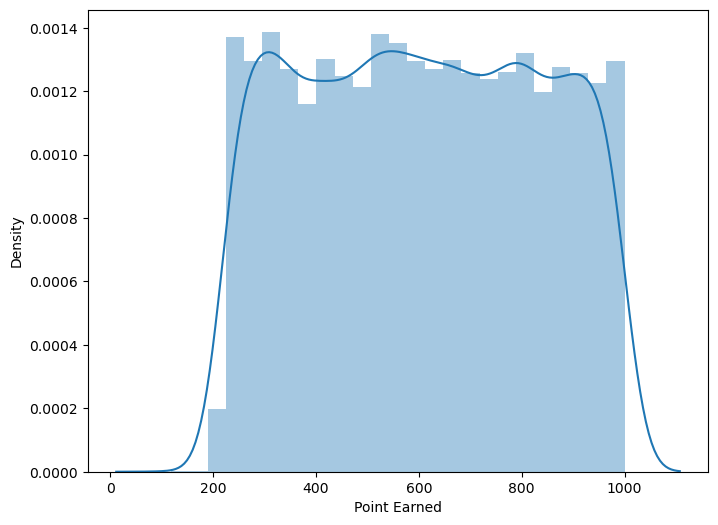

In [18]:
for i in data_num_cont_cols:
    plt.figure(figsize=(8,6))
    sns.distplot(data[i])
    plt.show()

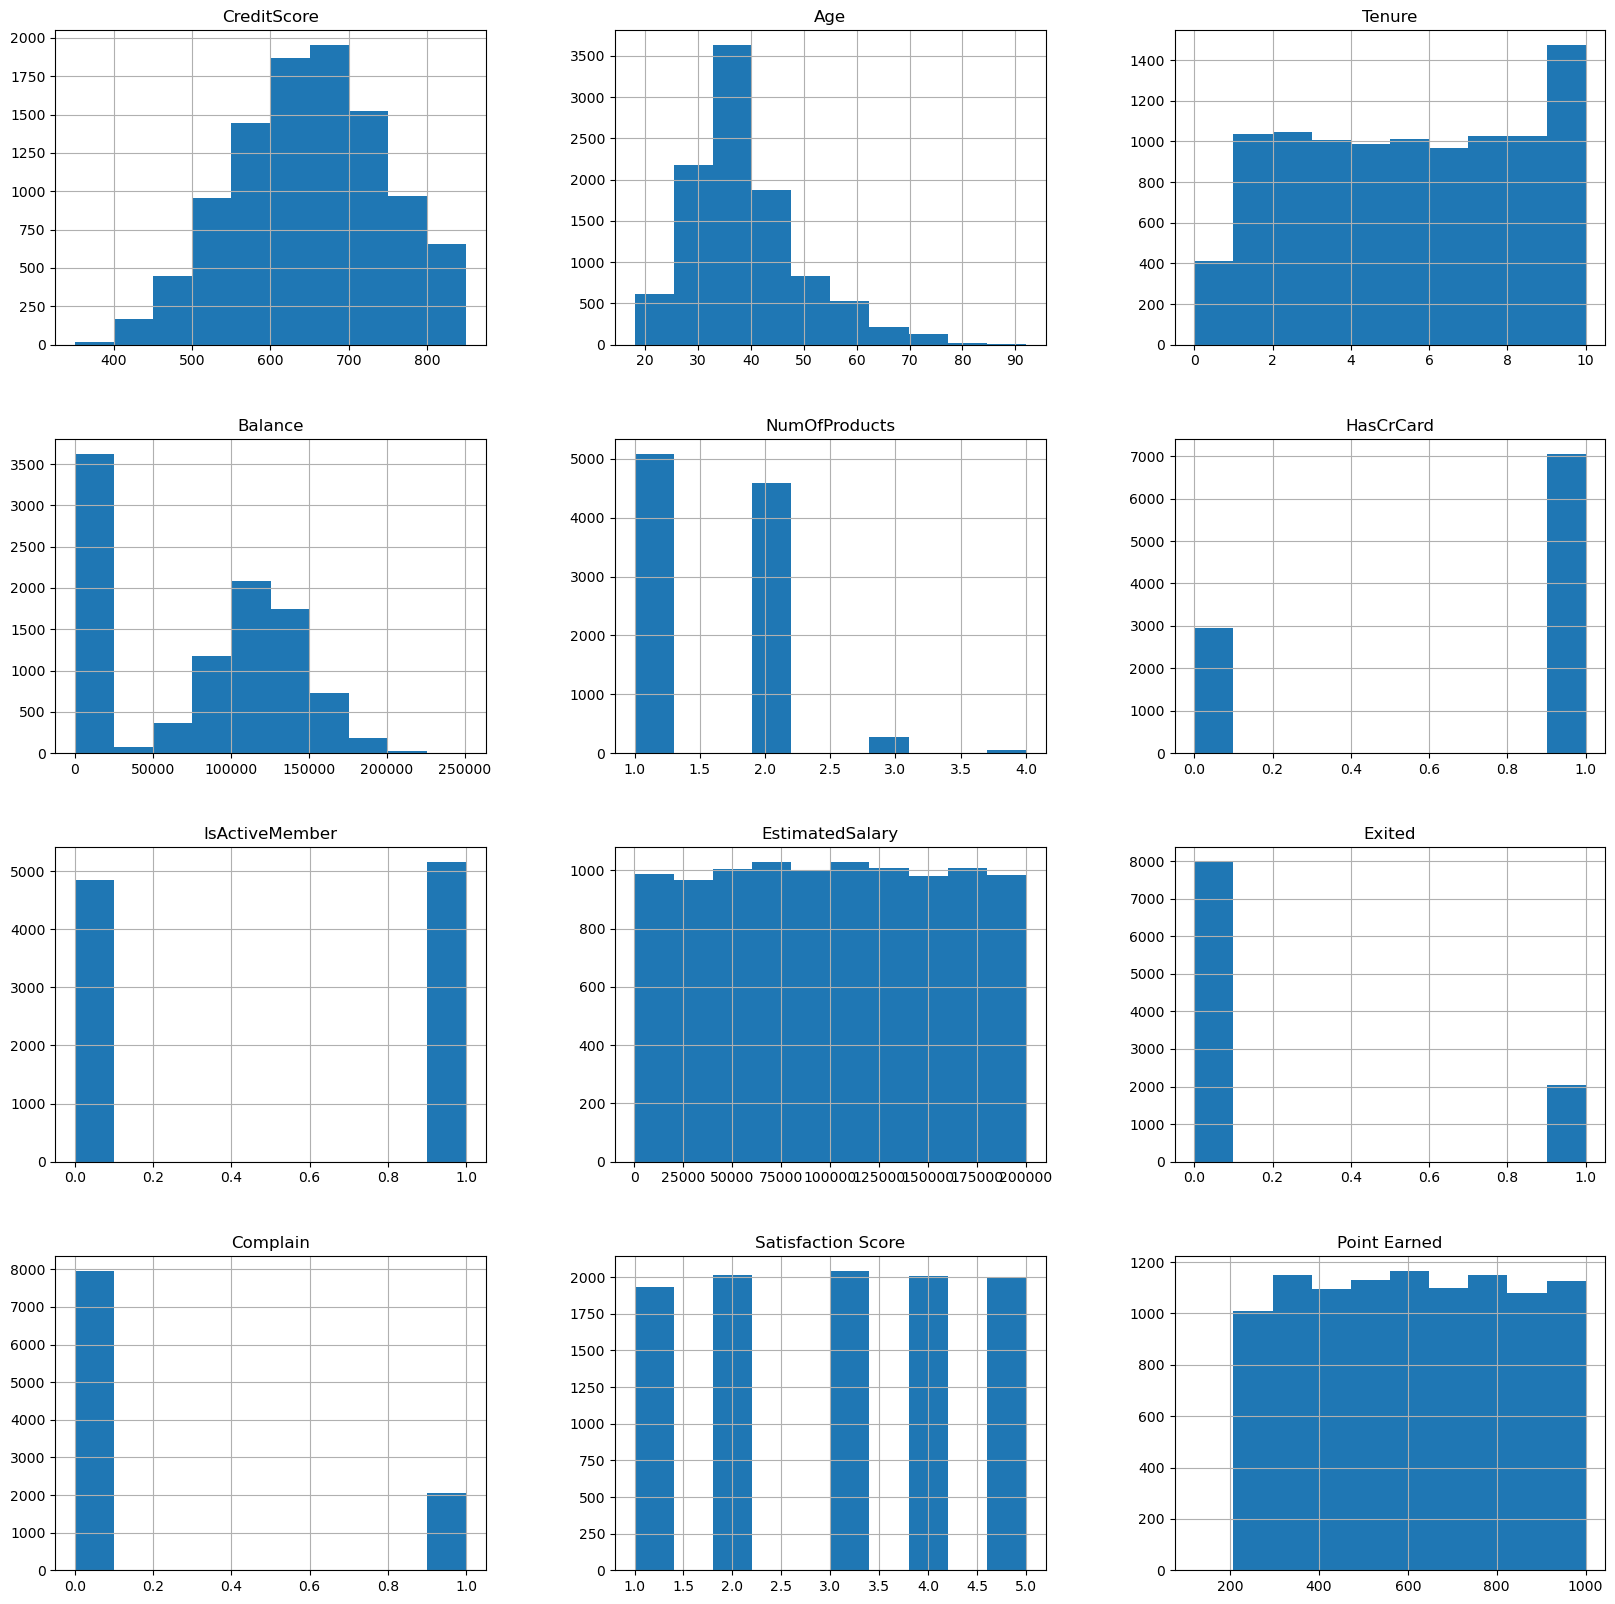

In [19]:
data.hist(figsize=(20,20))
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

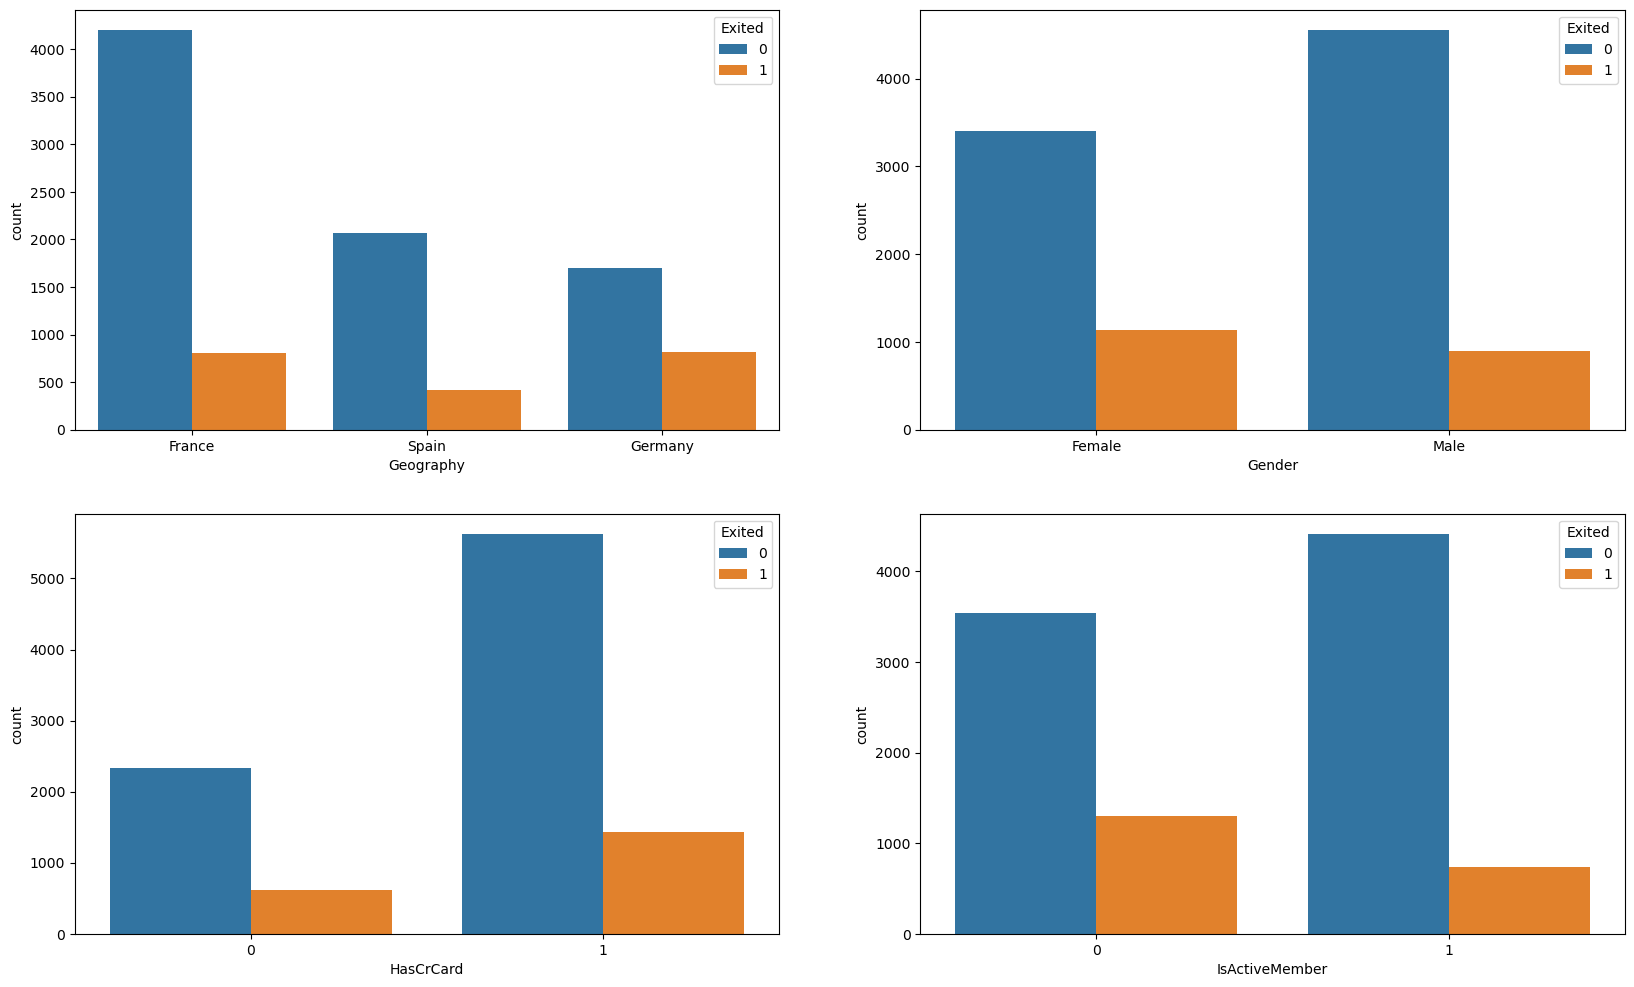

In [20]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

In [21]:
data.shape

(10000, 15)

In [22]:
# # Outliers:
# Q1=data_num.quantile(0.25)
# Q3=data_num.quantile(0.75)
# IQR=Q3-Q1
# lowerlimit=Q1-1.5*IQR
# upperlimit=Q3+1.5*IQR

In [23]:
# data = data[~((data_num>upperlimit)|(data_num<lowerlimit)).any(axis=1)]

In [24]:
# data.shape

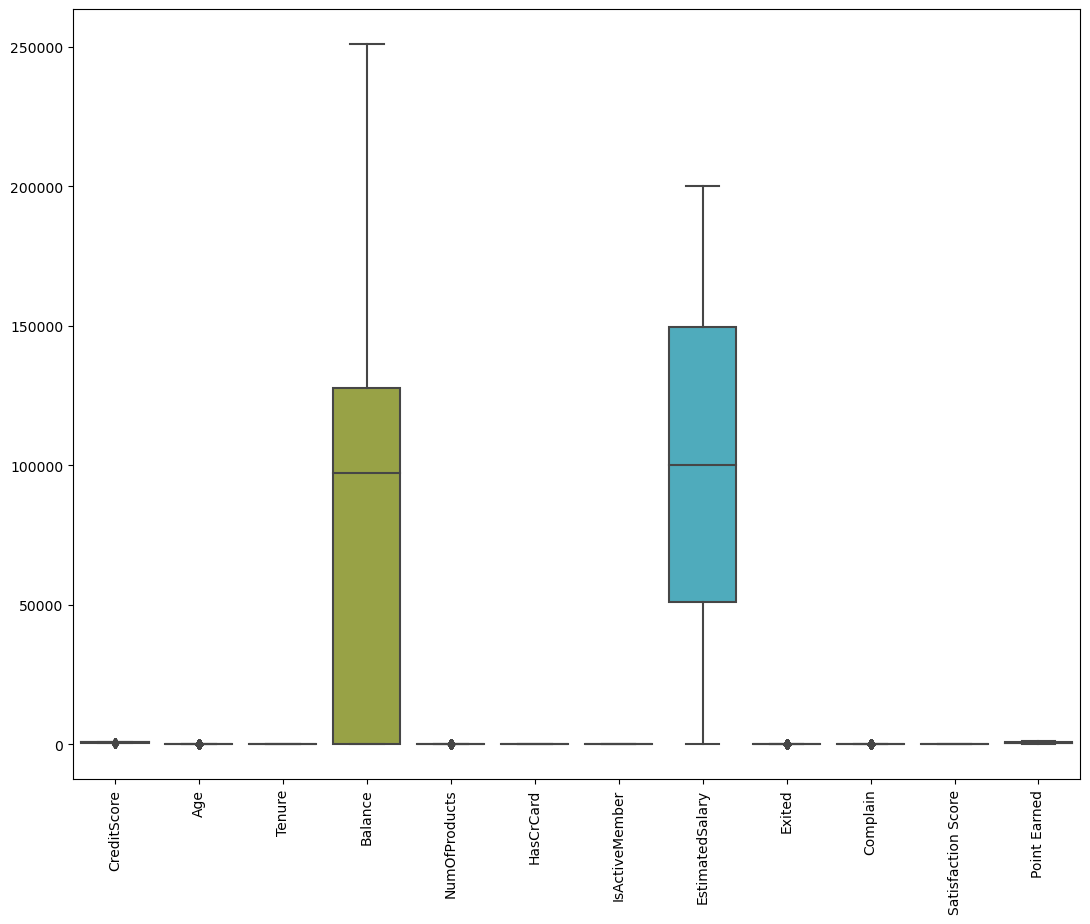

In [25]:
plt.figure(figsize=(13,10))
sns.boxplot(data)
plt.xticks(rotation = 90)
plt.show()

In [26]:
data_num_cat = data.select_dtypes('object')
data_num_cat

,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD
...,...,...,...
9995,France,Male,DIAMOND
9996,France,Male,PLATINUM
9997,France,Female,SILVER
9998,Germany,Male,GOLD


## Encoding Categorical Data

In [27]:
data= pd.get_dummies(data,drop_first=True,dtype='int') #drop_first is used to remove multicollinearity
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300,0,0,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,0,0,1,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564,0,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,1,0,1,1,0,0


In [28]:
data_copy=data.drop(columns='Exited')

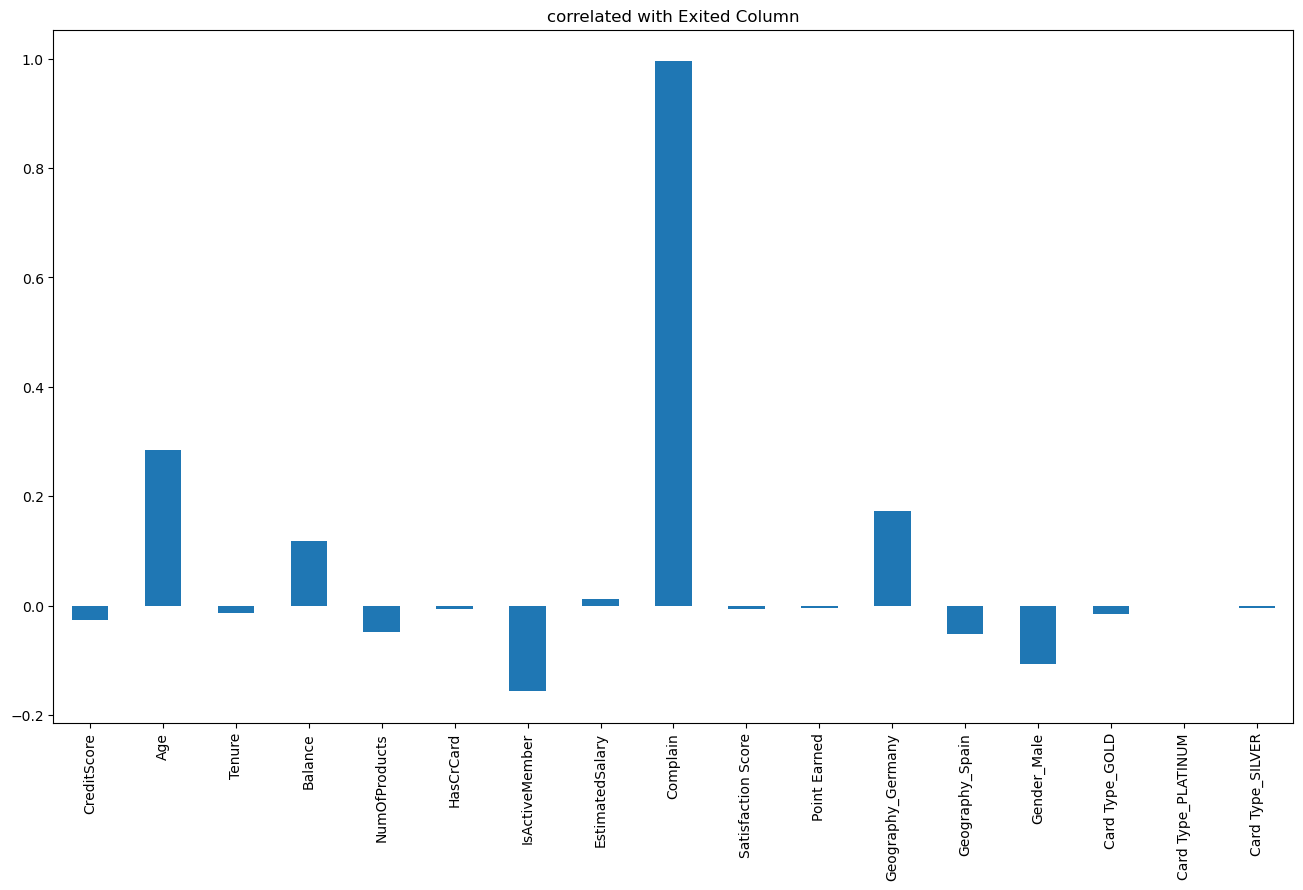

In [29]:
data_copy.corrwith(data['Exited']).plot(kind='bar',figsize=(16,9),title='correlated with Exited Column',rot=90)
plt.show()

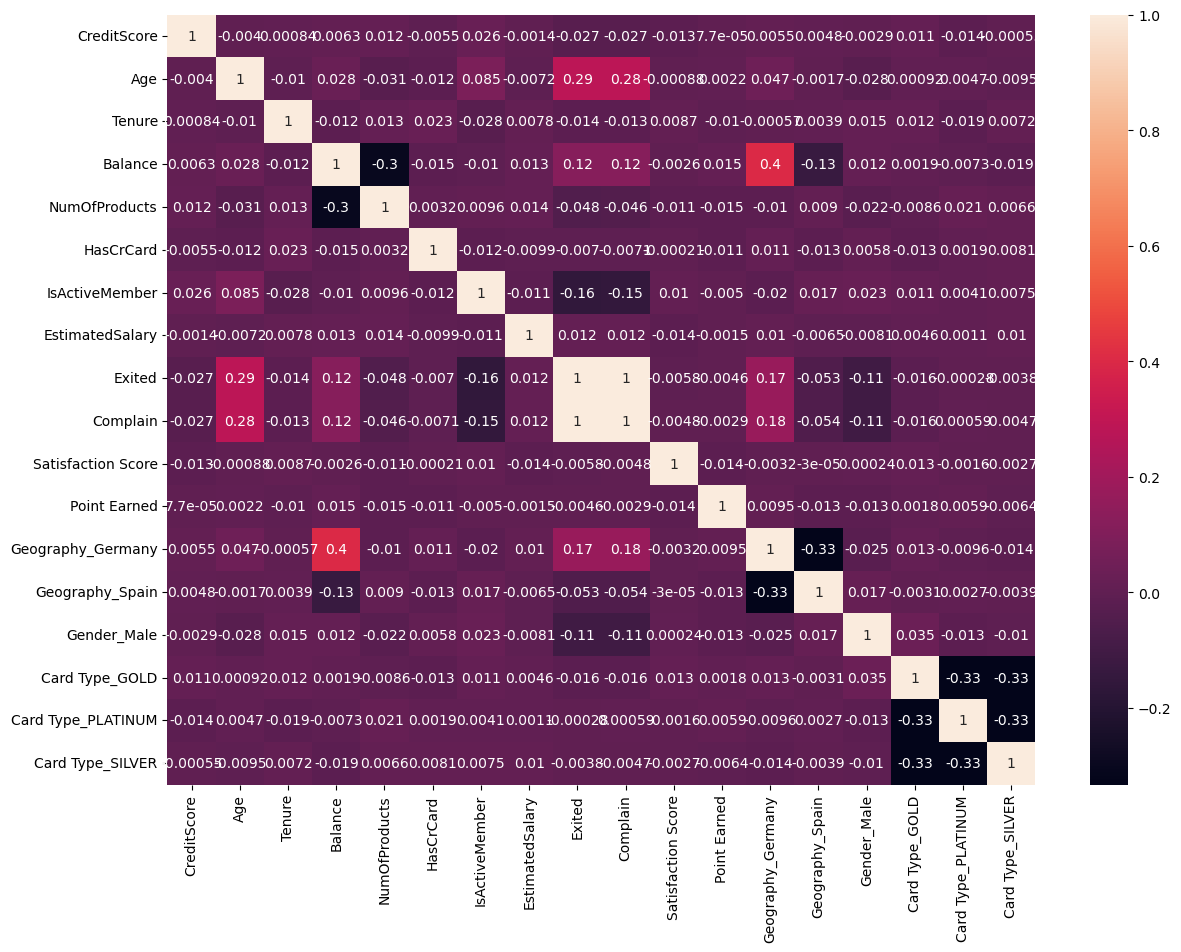

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Checking Target Variable Composition

In [31]:
data['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

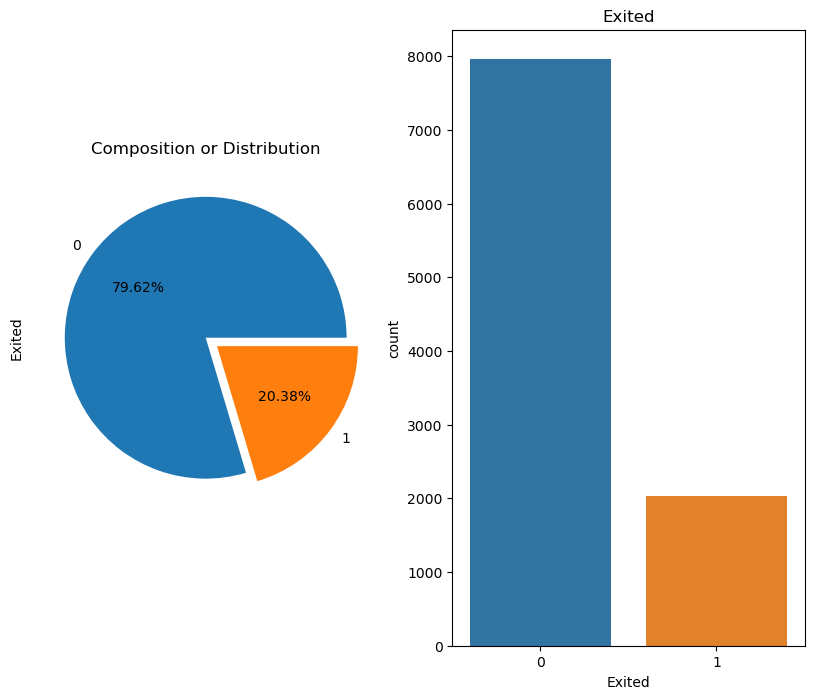

In [32]:
f, ax = plt.subplots(1,2,figsize=(10,8))
data['Exited'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=ax[0],explode=[0,0.1])
ax[0].set_title('Composition or Distribution')
sns.countplot(data=data,x='Exited',ax=ax[1])
ax[1].set_title('Exited')
plt.show()

**Interpretation:**

Churn prediction datasets are likely to have imbalanced class distribution. The number of customers who have churned is 2038 which is much less than the number of customers who did not churn i.e 7962. There is an imbalance in the target variable and it is important to eliminate this to get a reliable model.

In [33]:
X=data.drop(columns='Exited')
y=data['Exited']

## Handling Imbalanced Data with SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [36]:
y_res.value_counts()

1    7962
0    7962
Name: Exited, dtype: int64

## Splitting the Dataset into the training and testing set

In [37]:
#stratify sampling will force same class balance in both train and test

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

In [42]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #to avoid overfitting

# KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
model = knnc.fit(X_train,y_train)
y_pred_knnc = model.predict(X_test)

In [44]:
acc= accuracy_score(y_test,y_pred_knnc)
f1=f1_score(y_test,y_pred_knnc)
prec=precision_score(y_test,y_pred_knnc)
rec=recall_score(y_test,y_pred_knnc)
results = pd.DataFrame([['KNeighbors Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [45]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,KNeighbors Classifier,0.986185,0.986102,0.991741,0.980528


In [46]:
cm = confusion_matrix(y_test,y_pred_knnc)

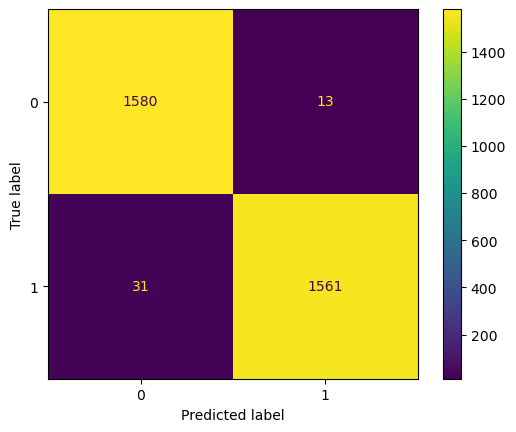

In [47]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [48]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [49]:
accuknnc= (TP+TN)/(TP+TN+FP+FN)
precknnc = TP/(TP+FP)
recallknnc = TP/(TP+FN)
accuknnc,precknnc,recallknnc

(0.9861852433281004, 0.9917407878017789, 0.9805276381909548)

# DecisionTree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(X_train,y_train)
y_pred_dtc = model.predict(X_test)

In [51]:
acc= accuracy_score(y_test,y_pred_dtc)
f1=f1_score(y_test,y_pred_dtc)
prec=precision_score(y_test,y_pred_dtc)
rec=recall_score(y_test,y_pred_dtc)
results = pd.DataFrame([['DecisionTree Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [52]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree Classifier,0.996546,0.996548,0.995611,0.997487


In [53]:
cm = confusion_matrix(y_test,y_pred_dtc)

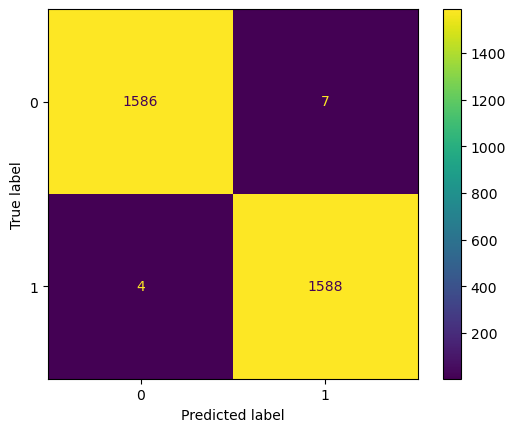

In [54]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [55]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [56]:
accudtc= (TP+TN)/(TP+TN+FP+FN)
precdtc = TP/(TP+FP)
recalldtc = TP/(TP+FN)
accudtc,precdtc,recalldtc

(0.9965463108320252, 0.9956112852664577, 0.9974874371859297)

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0)
model = lgr.fit(X_train,y_train)
y_pred_lgr = model.predict(X_test)

In [58]:
acc= accuracy_score(y_test,y_pred_lgr)
f1=f1_score(y_test,y_pred_lgr)
prec=precision_score(y_test,y_pred_lgr)
rec=recall_score(y_test,y_pred_lgr)
results = pd.DataFrame([['Logistic Regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1 Score','Precision','Recall'])

In [59]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.998116,0.998112,1.0,0.996231


In [60]:
cm= confusion_matrix(y_test,y_pred_lgr)

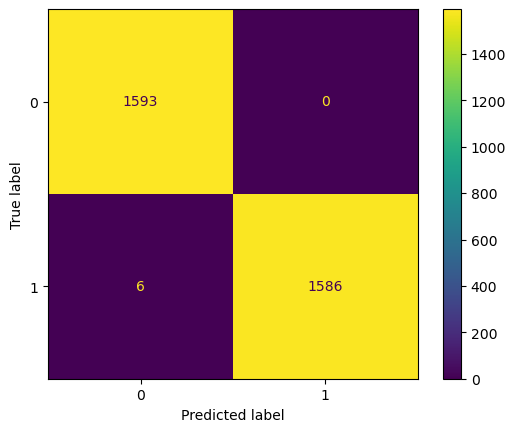

In [61]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [63]:
TN=cm[0,0]
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]

In [64]:
acculgr= (TP+TN)/(TP+TN+FP+FN)
preclgr = TP/(TP+FP)
recalllgr = TP/(TP+FN)
acculgr,preclgr,recalllgr

(0.998116169544741, 1.0, 0.9962311557788944)

In [74]:
models_performance = pd.DataFrame({'Models':['KNearest Neighbors','Decision Trees','Logistic Regression'],'Accuracy':[accuknnc,accudtc,acculgr],'Precision':[precknnc,precdtc,preclgr],'Recall':[recallknnc,recalldtc,recalllgr]})

In [75]:
models_performance

,Models,Accuracy,Precision,Recall
0,KNearest Neighbors,0.986185,0.991741,0.980528
1,Decision Trees,0.996546,0.995611,0.997487
2,Logistic Regression,0.998116,1.000000,0.996231


<Axes: xlabel='Models', ylabel='Accuracy'>

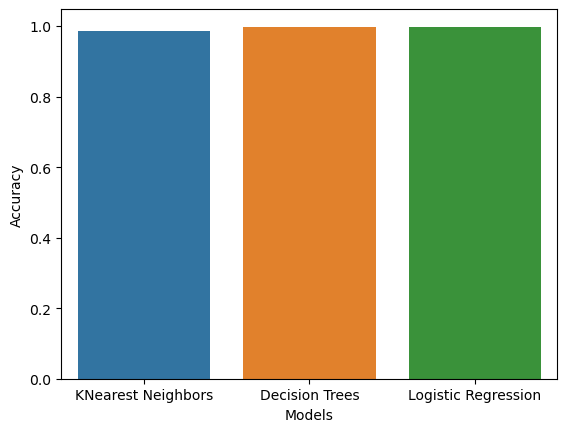

In [76]:
sns.barplot(x=models_performance['Models'],y=models_performance['Accuracy'])

In [ ]:
# In Bank Customer Churn, the main objective is to decrease False Negatives as they signify the opportunity loss.